<a href="https://colab.research.google.com/github/Maudhaffer/Project-1/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title: Project 1
###- Author: Maudhaffer Ben othmen

## Project Overview

## Load and Inspect Data


In [1]:
import pandas as pd
file_name = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df= pd.read_csv(file_name)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Clean Data


In [2]:
## 1) How many rows and colums?
# How many rows?
print(f'Number of rows: {df.shape[0]}')
# How many colums?
print(f' Number of colums: {df.shape[1]}')

Number of rows: 8523
 Number of colums: 12


In [3]:
## 2) What are the datatypes of each variable?
print("Data Types:")
print(df.dtypes)

Data Types:
Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


In [4]:
## 3) Are there duplicates? If so, drop any duplicates.
df.drop_duplicates(inplace=True)
print('Number of rows after dropping all duplicates:', df.shape[0])

Number of rows after dropping all duplicates: 8523


In [5]:
## 4) Identify missing values.
print('Missing Values:')
print(df.isnull().sum())

Missing Values:
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [17]:
## 5) Address the missing values by using a placeholder value.
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)



In [27]:
### Replace placeholders with null values
df.replace({'placeholder_value': np.nan}, inplace=True)

In [20]:
##6) Confirm that there are no missing values after addressing them.
print("Missing Values after addressing them:")
print(df.isnull().sum())

Missing Values after addressing them:
Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [8]:
##7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.lower()

In [9]:
##8) For any numerical columns, obtain the summary statistics of each (min, max, mean).
num_summary= df.describe()
print('Preview of the first few rows:')
print(df.head())
print("\nSummary Statistics of Numerical Columns:")
print(num_summary)

Preview of the first few rows:
  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          low fat         0.016047   
1           DRC01         5.92          regular         0.019278   
2           FDN15        17.50          low fat         0.016760   
3           FDX07        19.20          regular         0.000000   
4           NCD19         8.93          low fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999

## Exploratory Data Analysis


In [10]:
# import the required packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

Histograms to view the distributions of numerical features

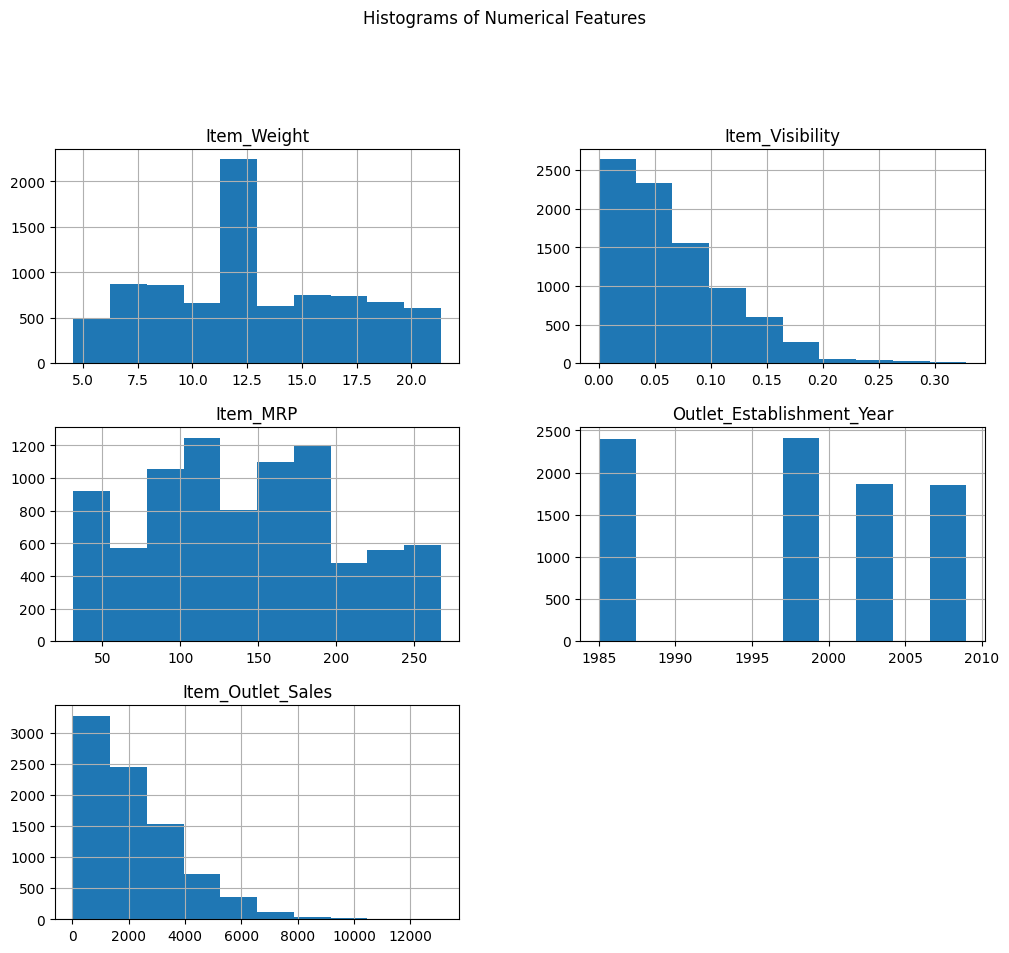

In [11]:
numerical_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
df[numerical_features].hist(figsize=(12, 10))
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.show()

Boxplots to View Statistical Summaries of Numerical Features:


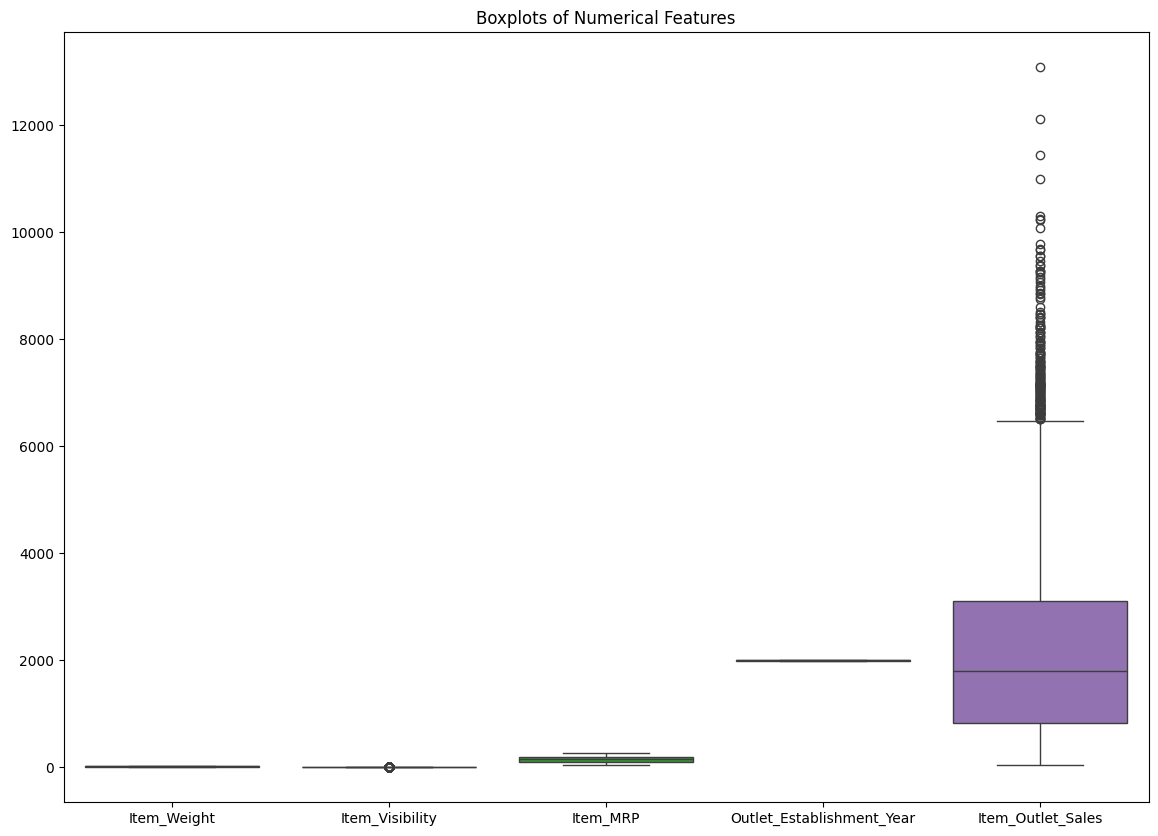

In [12]:
plt.figure(figsize=(14,10))
sns.boxplot(data=df[numerical_features])
plt.title('Boxplots of Numerical Features')
plt.show()

Countplot to View the Frequency of Each Class of Categorical Features:

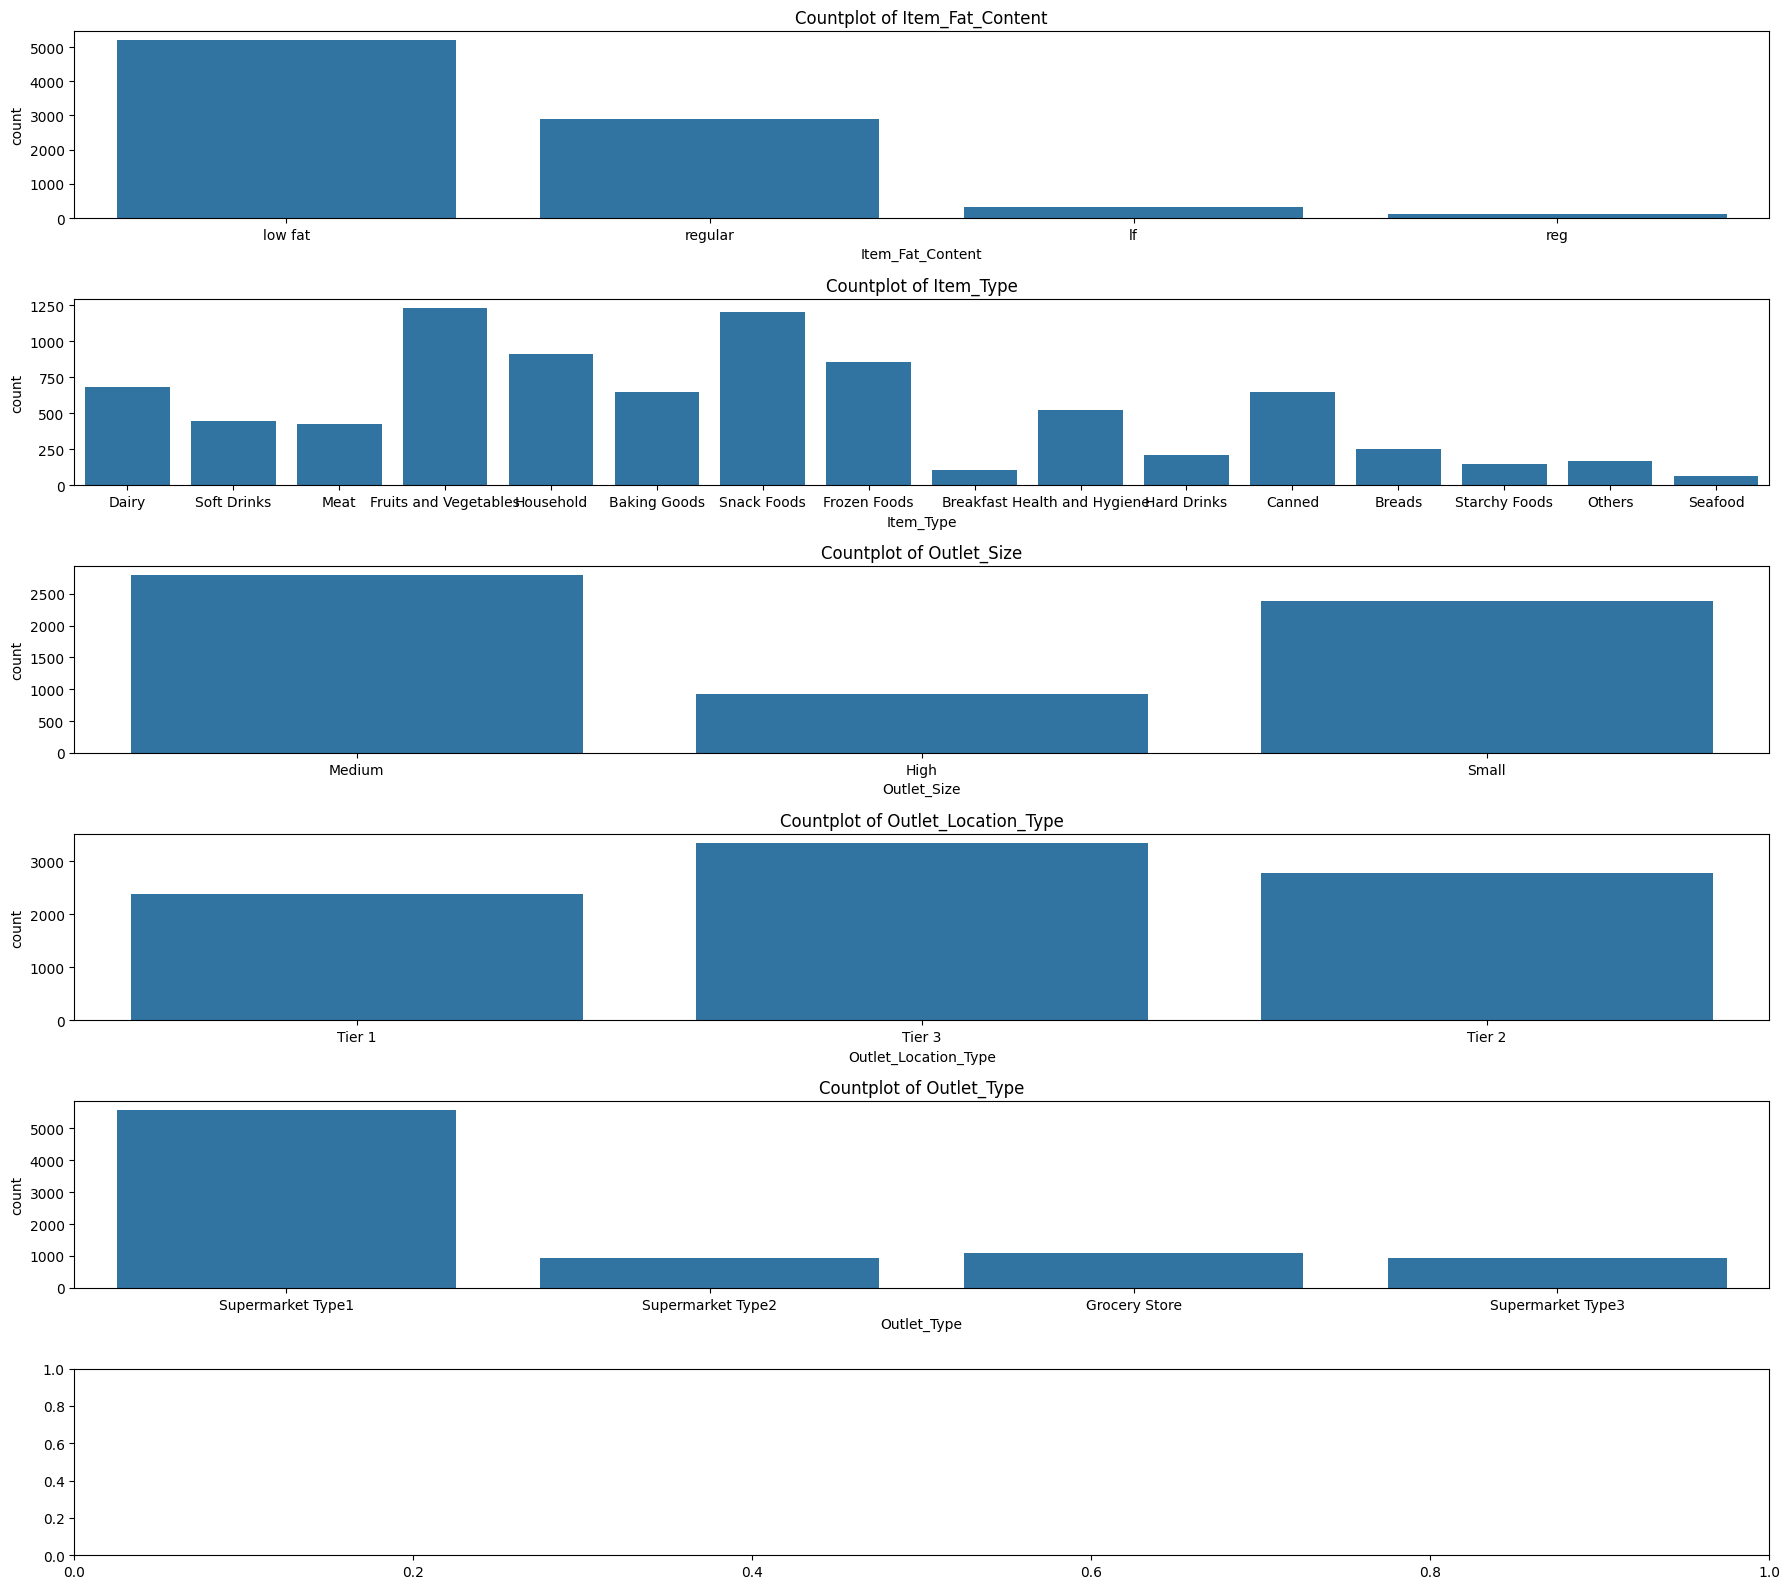

In [13]:
categorical_features = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(18, 16))
for feature, ax in zip(categorical_features, axes.flatten()):
    sns.countplot(x=feature, data=df, ax=ax)
    ax.set_title(f'Countplot of {feature}')
plt.tight_layout()
plt.show()

Heatmap to View the Correlation Between Features:

<ipython-input-14-a2b74771380d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_between_features = df.corr()


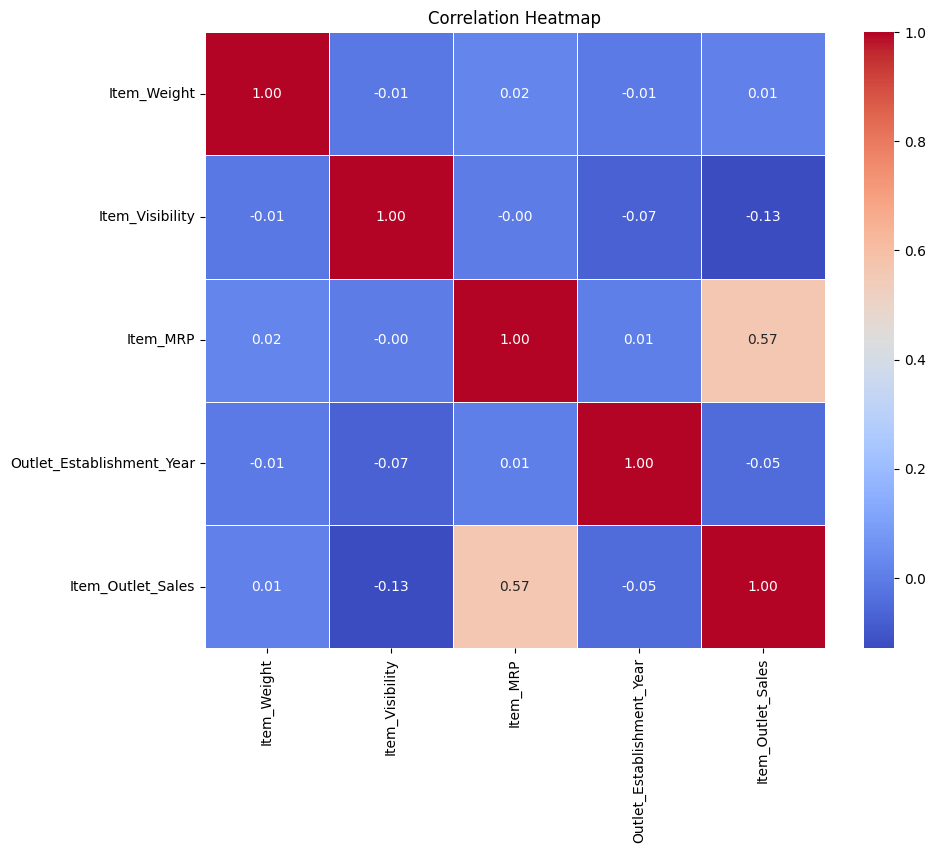

In [14]:
correlation_between_features = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_between_features, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

#Feature: Item_weight
##Definition: The weight of the product.

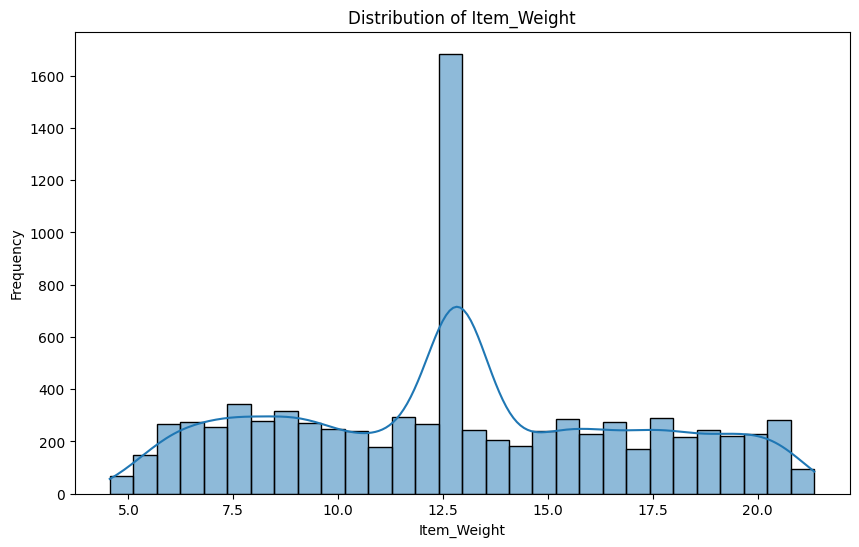

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Item_Weight'], bins=30, kde=True)
plt.title('Distribution of Item_Weight')
plt.xlabel('Item_Weight')
plt.ylabel('Frequency')
plt.show()

In [25]:
##assigning feature type
feature_type = 'Numeric'


In [ ]:
#Information on the Null values
null_values = df['Item_Weight'].isnull().sum()
null_percentage = (null_values / len(df)) * 100
#Displaying the info
print(f"Null values in Item_Weight: {null_values}")
print(f"Percentage of null values: {null_percentage:.2f}%")

In [29]:
##Imputing null values with mean
mean_item_weight = df['Item_Weight'].mean()
df['Item_Weight'].fillna(mean_item_weight, inplace=True)

1/Is the feature constant or quasi-constant?


The feature is quasi-Constant


2/What is the cardinality? Is it high (>10)?


The cardinality is higher than 10


3/Would we know this feature before the target is determined?


Yes we would know this feature before the target is determined

4/Is there a business case/understanding reason to exclude based on our business case?


There isn't a business case/understanding to exclude

#Create a multivariate visualization plotting each feature vs. the target.


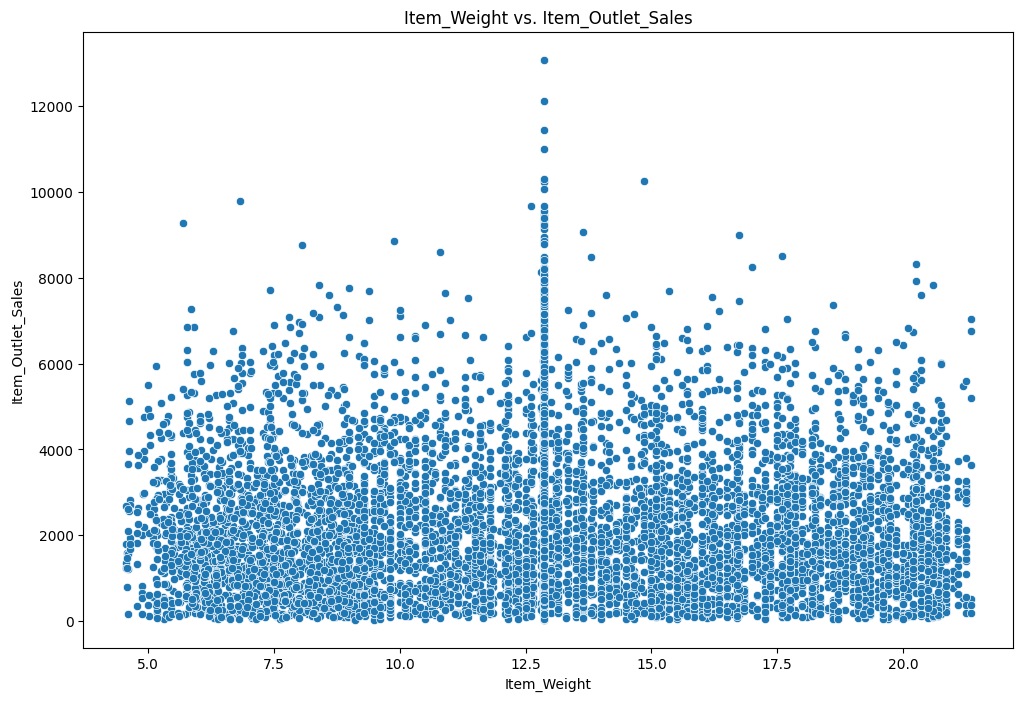

In [34]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales', data=df)
plt.title('Item_Weight vs. Item_Outlet_Sales')
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.show()

## Feature Inspection


1/Based on your business understanding, would you expect this feature to be a predictor of the target?

This feature is a predictor of the target


2/Does this feature appear to be a predictor of the target?